<a href="https://colab.research.google.com/github/bahadirbesirkestane/Staj/blob/main/Titanic_RegresyonAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dosya Linki https://drive.google.com/drive/folders/1_pcgrToKW_tGjPSnMSNfIYd2B7v0rOxf?usp=sharing

Titanic Veri Setinin Regresyon Analizi İle İncelenmesi

In [2]:
import pandas as pd

In [9]:
df=pd.read_csv("/content/titanic.csv")

In [10]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
df.shape

(1310, 14)

In [12]:
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [13]:
import seaborn as sns

>Hayatta kalan kişi sayısının tablo halinde gösterimi.

<Axes: xlabel='survived', ylabel='count'>

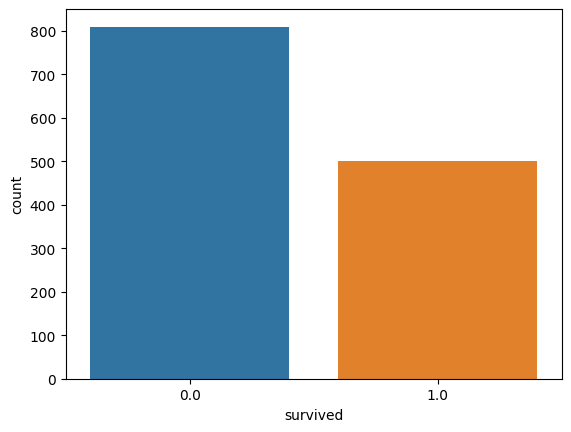

In [14]:
sns.countplot(x="survived",data=df)

>pclass değişkenine göre hayatta kalanlar ve kalmayanlar

<Axes: xlabel='survived', ylabel='count'>

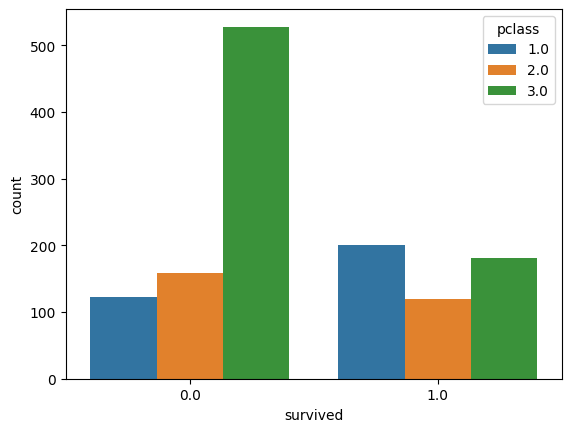

In [15]:
sns.countplot(x="survived",hue="pclass",data=df)

>Hayatta kalanların/kalmayanların cinsiyet dağılımı.

<Axes: xlabel='survived', ylabel='count'>

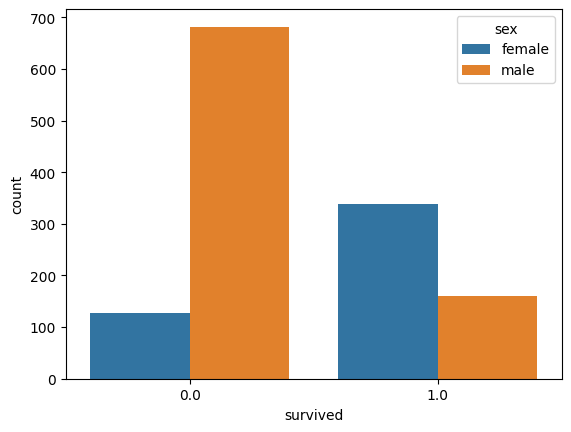

In [16]:
sns.countplot(x="survived",hue="sex",data=df)

>Kişilerin yaş histogramı

<Axes: ylabel='Frequency'>

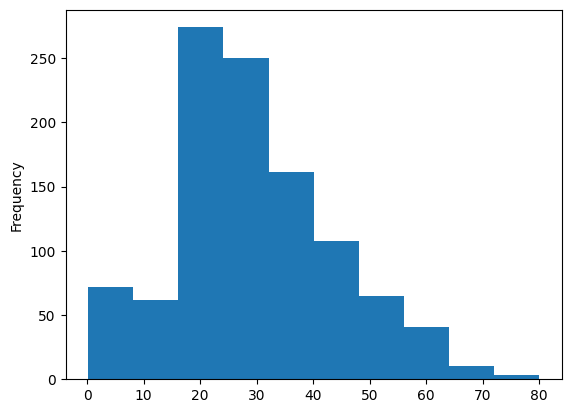

In [17]:
df["age"].plot.hist()

>Bilet Ücretlerinin histogramı

<Axes: ylabel='Frequency'>

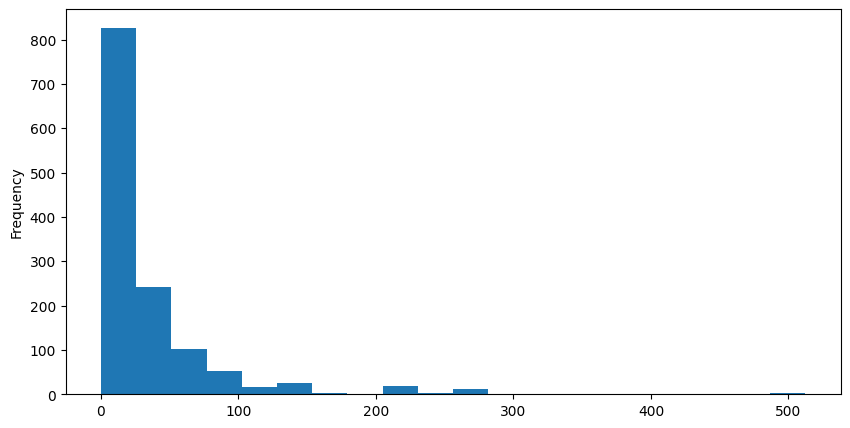

In [19]:
df["fare"].plot.hist(bins=20,figsize=(10,5))

>Yolcuların kardeş sayıları

<Axes: xlabel='sibsp', ylabel='count'>

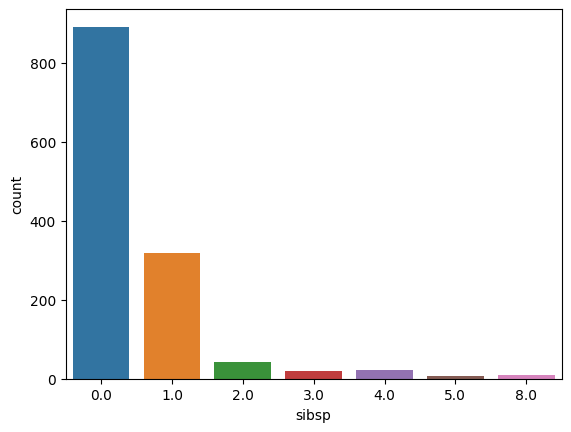

In [20]:
sns.countplot(x="sibsp",data=df)

**Veri Önişleme**

>Eksik verilerin kontrolü

In [22]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

<Axes: >

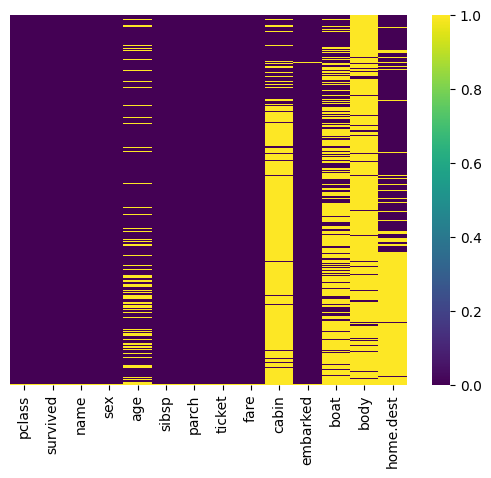

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

>Bazı sütunlarda çok fazla ekseik veri olduğu için o sütunları kaldırıyoruz.

In [25]:
df.drop(["cabin","boat","body","home.dest"],axis=1,inplace=True)

In [26]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [28]:
df.isnull().sum()

pclass        1
survived      1
name          1
sex           1
age         264
sibsp         1
parch         1
ticket        1
fare          2
embarked      3
dtype: int64

>Hala eksik veriler var. Eksik verierrin olduğu satırları kaldırıyoruz.

In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [32]:
df.dtypes

pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
embarked     object
dtype: object

>sex ve embarked değişkenlerinin analizi yapabilmek için dummy tipine dönüştürmemiz gerek.

In [34]:
sex=pd.get_dummies(df["sex"],drop_first=True)

In [35]:
sex.head()

,male
0,0
1,1
2,0
3,1
4,0


In [36]:
df.embarked.value_counts()

S    781
C    212
Q     50
Name: embarked, dtype: int64

In [37]:
embarked=pd.get_dummies(df["embarked"],drop_first=True)

In [38]:
pclass=pd.get_dummies(df["pclass"],drop_first=True)

In [39]:
df.drop(["sex","embarked","pclass"],axis=1,inplace=True)

In [40]:
df=pd.concat([df,sex,embarked,pclass],axis=1)

In [41]:
df.dtypes

survived    float64
name         object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
male          uint8
Q             uint8
S             uint8
2.0           uint8
3.0           uint8
dtype: object

In [43]:
df.drop(["name","ticket"],axis=1,inplace=True)

In [69]:
df.head()

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1043 non-null   float64
 1   age       1043 non-null   float64
 2   sibsp     1043 non-null   float64
 3   parch     1043 non-null   float64
 4   fare      1043 non-null   float64
 5   male      1043 non-null   uint8  
 6   Q         1043 non-null   uint8  
 7   S         1043 non-null   uint8  
 8   2.0       1043 non-null   uint8  
 9   3.0       1043 non-null   uint8  
dtypes: float64(5), uint8(5)
memory usage: 54.0 KB


## **Analiz**

In [70]:
X=df.drop("survived",axis=1)
y=df["survived"]

In [63]:
from sklearn.model_selection import train_test_split

>Veri Setinin Parçalanması

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)

>Hayatta kalma durumu araştırıldığı için ikili Lojistik Regresyon Analizi kullanılır.

In [84]:
from sklearn.linear_model import LogisticRegression

In [87]:
lg_model = LogisticRegression(random_state=100)
lg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [89]:
lg_model.score(X_test,y_test)

0.7701149425287356

In [92]:
lg_model.score(X_train,y_train)

0.8005115089514067

In [97]:
lg_model = LogisticRegression(C=0.1,random_state=100)
lg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, random_state=100)

In [98]:
lg_model.score(X_test,y_test)

0.7816091954022989

In [99]:
lg_model.score(X_train,y_train)

0.7966751918158568

**Model Değerlendirme**

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
tahmin=lg_model.predict(X_test)

In [104]:
confusion_matrix(y_test,tahmin)

array([[124,  21],
       [ 36,  80]])

In [105]:
df.head()

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [108]:
import numpy as np
new_data=np.array=([[29,0,0,211.3375,0,0,1,0,0]])

> Modelimize 1. kişinin değerlerini girdiğimizde 1 yani doğru sonuç verdi.

In [109]:
lg_model.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])

>Modeldeki her bir değişkenin katsayısı

In [111]:
lg_model.coef_

array([[-0.03196947, -0.32299603,  0.06470643,  0.00641632, -1.80762115,
        -0.45079684, -0.37529587, -0.17166277, -1.02575354]])

>Rastgele verilen değerlere göre test

In [113]:
new_data2=np.array=([[45,1,0,492.279,0,0,1,1,0]])
lg_model.predict(new_data2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])